In [1]:
from typing import Tuple
import torch
import numpy as np
import kornia
import matplotlib.pyplot as plt
from custom_models import *
from custom_datasets import *
temp_wsi_Good_patch_path = '/home/rayeh/workspace/project/med/data/data_512/imgs'
temp_mask_Good_patch_path = '/home/rayeh/workspace/project/med/data/data_512/masks'
train_data = MedDataset(temp_wsi_Good_patch_path, temp_mask_Good_patch_path, 1)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True, drop_last=True)
data_len = len(train_data)


/home/rayeh/miniconda3/envs/autodo/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
trainAugModel = Med_AugmentModel_2(N=data_len, magn=5, apply=True,  mode=1, grad=True, device='cpu')

In [3]:
loader = iter(train_loader)

In [4]:
data = next(loader)
idx = data['idx']
rgb = data['image']
mask = data['mask']

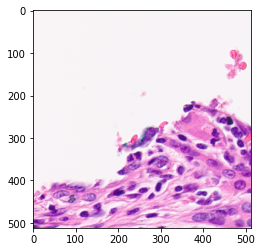

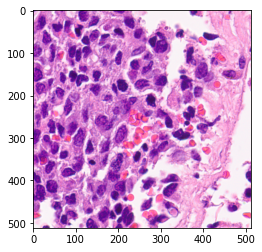

In [5]:
img = torch.permute(rgb[0], (1,2,0)).numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = torch.permute(rgb[1], (1,2,0)).numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

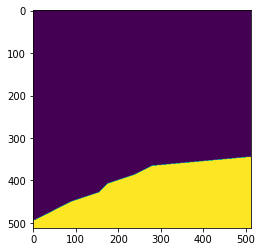

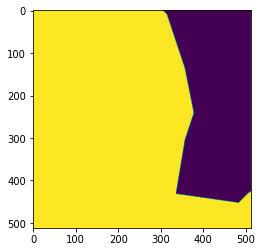

In [6]:
img = mask[0].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = mask[1].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

In [7]:
aug_data = trainAugModel(idx,data)

/home/rayeh/miniconda3/envs/autodo/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/rayeh/workspace/project/med/Med_AutoDO/custom_models/automodels.py:523: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  CTR: torch.tensor = torch.cat((W*torch.ones(B).to(device)//2, H*torch.ones(B).to(device)//2)).view(-1,2)


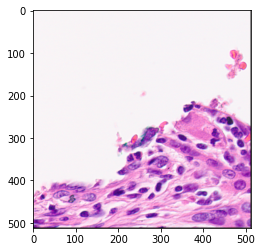

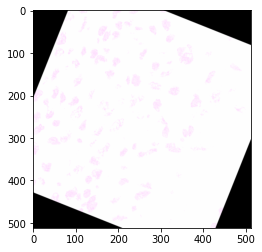

In [8]:
aug = aug_data['image']
aug_mask = aug_data['mask']
img = torch.permute(aug[0], (1,2,0)).detach().numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = torch.permute(aug[1], (1,2,0)).detach().numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

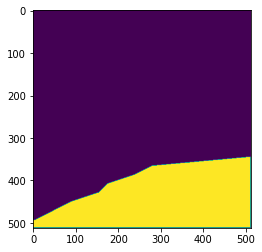

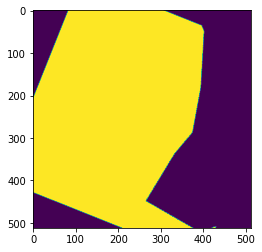

In [9]:
img = aug_mask[0].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)
img = aug_mask[1].numpy()
plt.figure(figsize=(4,4))
plt.imshow(img)

In [10]:
# print(sum(data['image'].view(-1,1))-sum(aug_data['image'].view(-1,1)))

In [12]:
print(aug_data['aug_ops'][0])

[('idenity', [1.0])]
